In [2]:
!pip install ultralytics opencv-python-headless pycocotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from ultralytics import YOLO

import matplotlib.pyplot as plt
import cv2
import json
from google.colab.patches import cv2_imshow
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np

# yolov8l.pt | yolov8m.pt
model = YOLO('yolov8n.pt')
model2 = YOLO('yolov8m.pt')
model3 = YOLO('yolov8l.pt')

In [5]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

def detect_people(image, model):
    results = model(image, conf=0.25, iou=0.9)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    classes = [model.names[int(cls)] for cls in results[0].boxes.cls.cpu().numpy()]
    return boxes, classes

def draw_boxes(image, boxes, classes):
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box[:4]
        label = classes[i]
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return image

def display_image(image):
    if isinstance(image, np.ndarray) and image.dtype == np.uint8:
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        raise TypeError("Gambar harus berupa array numpy dengan tipe data uint8")

def process_video(video_path, model, output_path='output_video.avi'):
    cap = cv2.VideoCapture(video_path)

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        boxes, classes = detect_people(frame_rgb, model)

        frame_with_boxes = draw_boxes(frame_rgb, boxes, classes)

        frame_bgr = cv2.cvtColor(frame_with_boxes, cv2.COLOR_RGB2BGR)

        out.write(frame_bgr)

    cap.release()
    out.release()

def detect_and_annotate(image_path, model, output_json='predictions.json'):
    image = load_image(image_path)

    boxes, classes = detect_people(image, model)

    predictions = []
    for i, box in enumerate(boxes):
        prediction = {
            "image_id": 1,
            "category_id": 1,
            "bbox": box[:4].tolist(),
            "score": 0.9  # Skor prediksi, ini harus digantikan dengan skor asli dari model jika tersedia
        }
        predictions.append(prediction)

    with open(output_json, 'w') as f:
        json.dump(predictions, f)

    image_with_boxes = draw_boxes(image.copy(), boxes, classes)
    display_image(image_with_boxes)

    return predictions

def display_video(video_path):
    video = open(video_path, "rb").read()
    video_b64 = b64encode(video).decode()

    video_tag = f'''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
    </video>
    '''

    return HTML(video_tag)


0: 384x640 12 persons, 1 handbag, 179.4ms
Speed: 6.0ms preprocess, 179.4ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


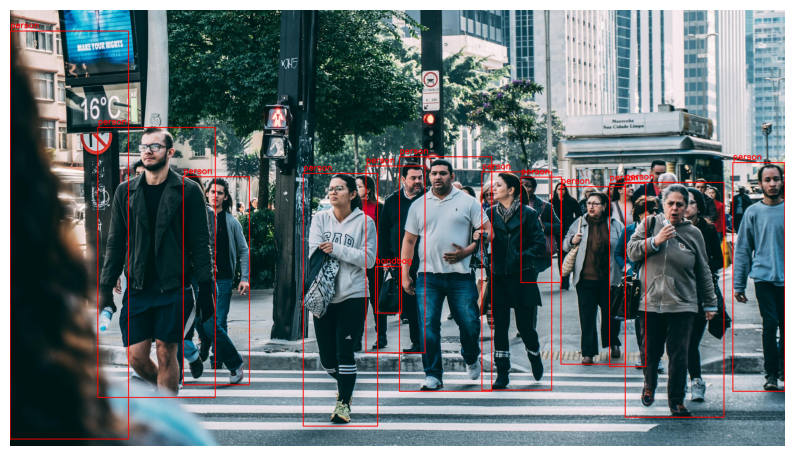

In [36]:
image_path = '/content/drive/MyDrive/datatest/walkpeople2.jpeg'
boxes, classes = detect_people(image, model)
image_with_boxes = draw_boxes(image.copy(), boxes, classes)
display_image(image_with_boxes)



0: 384x640 20 persons, 3 handbags, 1488.3ms
Speed: 8.6ms preprocess, 1488.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 persons, 3 handbags, 1274.3ms
Speed: 4.0ms preprocess, 1274.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


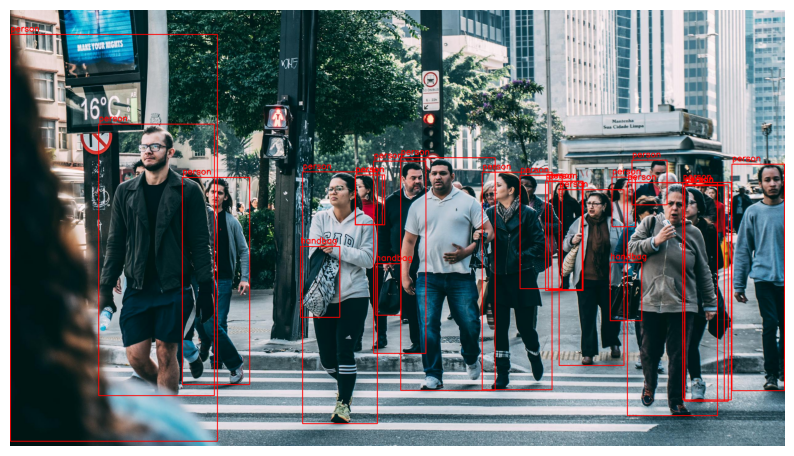

[{'image_id': 1,
  'category_id': 1,
  'bbox': [288.9451599121094,
   373.6369934082031,
   664.290771484375,
   1254.3912353515625],
  'score': 0.9},
 {'image_id': 1,
  'category_id': 1,
  'bbox': [2347.26318359375,
   503.5690612792969,
   2518.899169921875,
   1238.231689453125],
  'score': 0.9},
 {'image_id': 1,
  'category_id': 1,
  'bbox': [1270.4136962890625,
   482.0504150390625,
   1577.9718017578125,
   1237.4422607421875],
  'score': 0.9},
 {'image_id': 1,
  'category_id': 1,
  'bbox': [560.2664184570312,
   546.0823364257812,
   779.959228515625,
   1218.3011474609375],
  'score': 0.9},
 {'image_id': 1,
  'category_id': 1,
  'bbox': [1785.464111328125,
   586.91650390625,
   1996.7177734375,
   1156.089599609375],
  'score': 0.9},
 {'image_id': 1,
  'category_id': 1,
  'bbox': [2007.453125,
   563.2379150390625,
   2300.225830078125,
   1319.33544921875],
  'score': 0.9},
 {'image_id': 1,
  'category_id': 1,
  'bbox': [951.1365356445312,
   528.9052124023438,
   1194.688354

In [10]:
image_path = '/content/drive/MyDrive/datatest/walkpeople2.jpeg'
image = load_image(image_path)
boxes, classes = detect_people(image, model2)
image_with_boxes = draw_boxes(image.copy(), boxes, classes)
#display_image(image_with_boxes)
detect_and_annotate(image_path, model2, output_json='/content/drive/MyDrive/datatest/predictions.json')



0: 384x640 15 persons, 4 handbags, 2429.0ms
Speed: 3.5ms preprocess, 2429.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


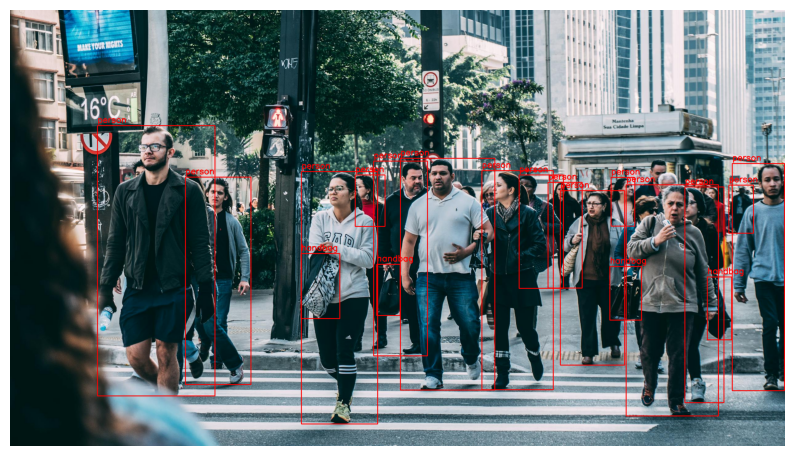

In [46]:
image_path = '/content/drive/MyDrive/datatest/walkpeople2.jpeg'
image = load_image(image_path)
boxes, classes = detect_people(image, model3)
image_with_boxes = draw_boxes(image.copy(), boxes, classes)
display_image(image_with_boxes)


In [51]:
def create_ground_truths():
    ground_truths = {
        "images": [
            {"id": 1, "width": 640, "height": 480, "file_name": "image1.jpg"},
        ],
        "annotations": [
            {"image_id": 1, "category_id": 1, "bbox": [50, 50, 100, 150], "area": 100*150, "iscrowd": 0, "id": 1},
        ],
        "categories": [
            {"id": 1, "name": "person", "supercategory": "none"},
        ]
    }
    with open('/content/ground_truths.json', 'w') as f:
        json.dump(ground_truths, f)




In [52]:
import json

def compute_map(predictions_path, ground_truths_path, iou_threshold=0.5):
    coco_gt = COCO(ground_truths_path)
    coco_dt = coco_gt.loadRes(predictions_path)

    coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
    coco_eval.params.iouThrs = [iou_threshold]

    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    return coco_eval.stats[0]

# Hitung Map
map_score = compute_map('/content/predictions.json', '/content/ground_truths.json')
print(f"mAP: {map_score}")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.50 | area= large | maxDets=100 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets=  1 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | maxDets= 10 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.50 | area=   all | max

In [ ]:
video_path = '/content/drive/MyDrive/datatest/video1walkpeople.mp4'  # Update with the correct path to your video

output_path = '/content/drive/MyDrive/datatest/output_video.avi'
process_video(video_path, model, output_path=output_path)

# Tampilkan video yang dihasilkan
display_video(output_path)